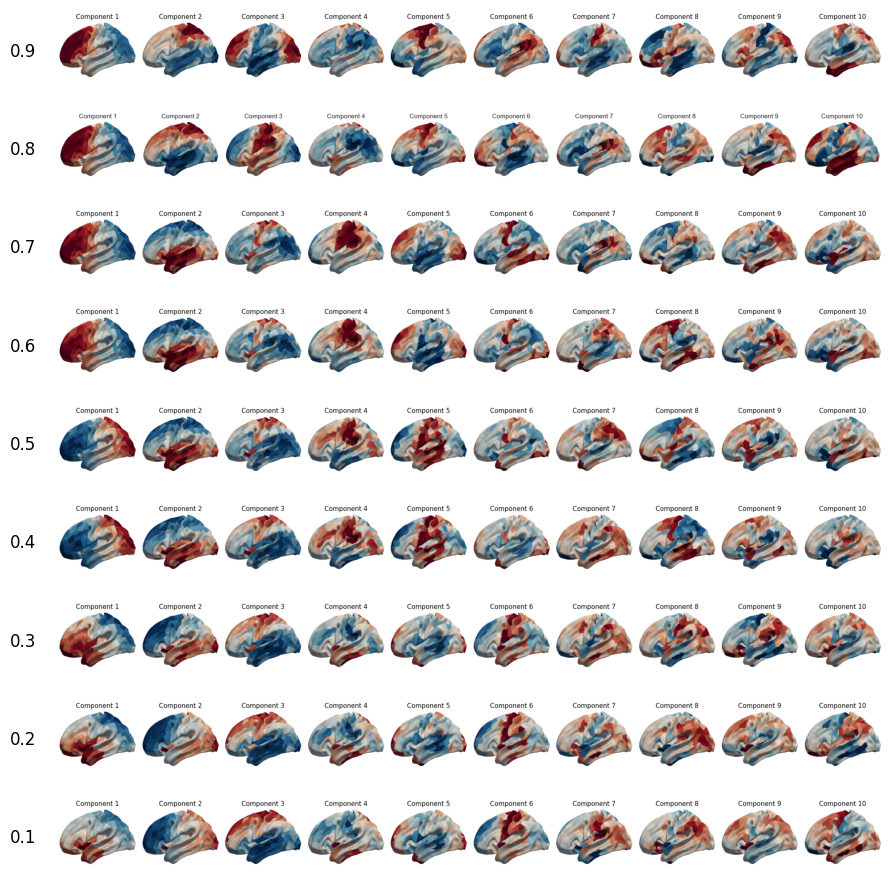

In [1]:

import os
import glob
from matplotlib import pyplot as plt
from matplotlib.image import imread

# Set the folder to "HCP" in the current working directory
hcp_folder = os.path.join(os.getcwd(), "HCP")

# Find all PNGs that match the template for the left hemisphere (lh) and sparsity values 0 through 0.9, reversed (0.9..0.0)
image_paths = []
for i in reversed(range(10)):
    sparsity = i / 10
    pattern = f"hcp_template_grad_lh_sparsity_{sparsity}.png"
    p = os.path.join(hcp_folder, pattern)
    if os.path.exists(p):
        image_paths.append(p)

# Sort by sparsity value (descending order)
def extract_sparsity(p):
    filename = os.path.basename(p)
    parts = filename.split("_")
    val_str = parts[-1].replace(".png","")
    try:
        return float(val_str)
    except:
        return -1

image_paths = sorted(image_paths, key=extract_sparsity, reverse=True)

# Plot all images in a large figure (rows not columns)
n = len(image_paths)
ncols = 1  # Choose number of images per row
nrows = (n + ncols - 1) // ncols  # Ceiling division for rows

fig, axs = plt.subplots(nrows, ncols, figsize=(20*ncols, nrows))

# If axs is 1D when nrows==1, make it 2D for easier indexing
if nrows == 1:
    axs = [axs]
axs = axs.reshape(nrows, ncols) if hasattr(axs, 'reshape') else axs

for idx, (img_path) in enumerate(image_paths):
    row = idx // ncols
    col = idx % ncols
    ax = axs[row][col] if nrows > 1 else axs[col]
    img = imread(img_path)
    ax.imshow(img)
    ax.axis("off")
    # Extract only the sparsity value from the filename for the title
    sparsity_val = os.path.basename(img_path).replace(".png", "").split("_")[-1]
    ax.text(-0.02, 0.5, sparsity_val, fontsize=12, va='center', ha='right', rotation=0, transform=ax.transAxes)

# Turn off unused axes
for idx in range(n, nrows * ncols):
    row = idx // ncols
    col = idx % ncols
    ax = axs[row][col] if nrows > 1 else axs[col]
    ax.axis("off")

plt.tight_layout()
plt.show()


In [19]:
data = np.load('EXVIVO/grad_algnd2_total_grad_lh_sparsity_0.1.npz')
print(data.items())
# Print all array keys available in the loaded npz file
print("Available keys:", list(data.keys()))

# To read arrays from the loaded npz file, use:
for key in data.keys():
    arr = data[key]
    print(f"Key: {key}, Shape: {arr.shape}, Dtype: {arr.dtype}")
    # You can now use 'arr' for further processing


ItemsView(NpzFile 'EXVIVO/grad_algnd2_total_grad_lh_sparsity_0.1.npz' with keys: arrays, labels, metrics)
Available keys: ['arrays', 'labels', 'metrics']
Key: arrays, Shape: (6, 32492, 10), Dtype: float64
Key: labels, Shape: (6, 3), Dtype: <U1
Key: metrics, Shape: (6,), Dtype: <U11


0.1
KeysView(NpzFile 'EXVIVO/grad_algnd2_total_grad_lh_sparsity_0.1.npz' with keys: arrays, labels, metrics)
(32492,)
0.2
KeysView(NpzFile 'EXVIVO/grad_algnd2_total_grad_lh_sparsity_0.2.npz' with keys: arrays, labels, metrics)
(32492,)
0.3
KeysView(NpzFile 'EXVIVO/grad_algnd2_total_grad_lh_sparsity_0.3.npz' with keys: arrays, labels, metrics)
(32492,)
0.4
KeysView(NpzFile 'EXVIVO/grad_algnd2_total_grad_lh_sparsity_0.4.npz' with keys: arrays, labels, metrics)
(32492,)
0.5
KeysView(NpzFile 'EXVIVO/grad_algnd2_total_grad_lh_sparsity_0.5.npz' with keys: arrays, labels, metrics)
(32492,)
0.6
KeysView(NpzFile 'EXVIVO/grad_algnd2_total_grad_lh_sparsity_0.6.npz' with keys: arrays, labels, metrics)
(32492,)
0.7
KeysView(NpzFile 'EXVIVO/grad_algnd2_total_grad_lh_sparsity_0.7.npz' with keys: arrays, labels, metrics)
(32492,)
0.8
KeysView(NpzFile 'EXVIVO/grad_algnd2_total_grad_lh_sparsity_0.8.npz' with keys: arrays, labels, metrics)
(32492,)
0.9
KeysView(NpzFile 'EXVIVO/grad_algnd2_total_grad_lh_s

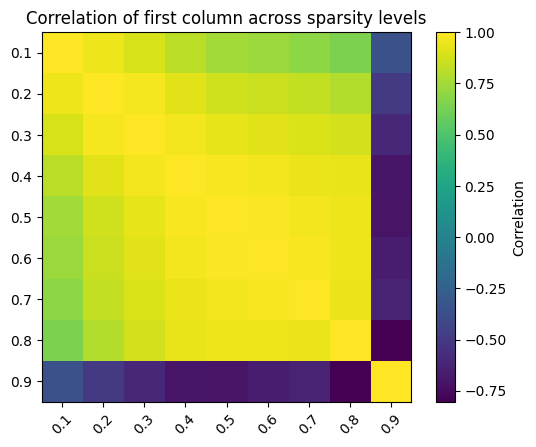

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the desired sparsity values: 0.0, 0.1, ..., 0.9 (10 in total)
sparsity_vals = np.arange(0.1, 1.0, 0.1)
sparsity_vals = np.round(sparsity_vals, 1)  # Ensure exact decimals

corrs = []

for s in sparsity_vals:
    print(s)
    fname = f"EXVIVO/grad_algnd2_total_grad_lh_sparsity_{s:.1f}.npz"
    data = np.load(fname)
    print(data.keys())
    col = data['arrays'][0,:,0]
    print(col.shape)

    corrs.append(col)


corrs = np.array(corrs)
print(corrs.shape)
# Compute pairwise correlation matrix between all sparsity levels (for first columns)
corr_matrix = np.corrcoef(corrs)

print(corr_matrix.shape)
plt.imshow(corr_matrix, cmap='viridis')
plt.colorbar(label='Correlation')
plt.xticks(ticks=np.arange(len(sparsity_vals)), labels=[f"{v:.1f}" for v in sparsity_vals], rotation=45)
plt.yticks(ticks=np.arange(len(sparsity_vals)), labels=[f"{v:.1f}" for v in sparsity_vals])
plt.title("Correlation of first column across sparsity levels")
plt.show()